In [1]:
#!python -m pip install ruptures

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ruptures as rpt

In [19]:
data = pd.read_csv("JKH 2022-2023.csv")
data.head()

,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,1/3/2022,153.25,149.0,152.75,321,799594,121924661
1,1/4/2022,153.25,149.0,149.50,177,317312,47828320
2,1/5/2022,151.75,147.0,150.75,232,1557752,234256848
3,1/6/2022,152.00,148.5,151.00,189,318537,47954695
4,1/7/2022,158.25,150.0,155.50,627,3343693,512681469


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            293 non-null    object 
 1   High           293 non-null    float64
 2   Low            293 non-null    float64
 3   Close          293 non-null    float64
 4   No. of Trades  293 non-null    int64  
 5   No. of Shares  293 non-null    int64  
 6   Turnover(Rs.)  293 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 16.1+ KB


In [21]:
len(data)

293

In [22]:
data.sort_values('Day', inplace=True)
data.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=False)

In [23]:
data.head()

,index,Day,High,Low,Close,No. of Trades,No. of Shares,Turnover(Rs.)
0,0,1/10/2022,159.00,154.00,157.00,359,431534,67665139
1,1,1/10/2023,136.25,135.25,135.25,46,104227,14122955
2,2,1/11/2022,160.75,152.50,157.50,237,507646,79308624
3,3,1/11/2023,136.00,135.50,136.00,43,132159,17957959
4,4,1/12/2022,157.50,156.00,157.00,166,123969,19435506


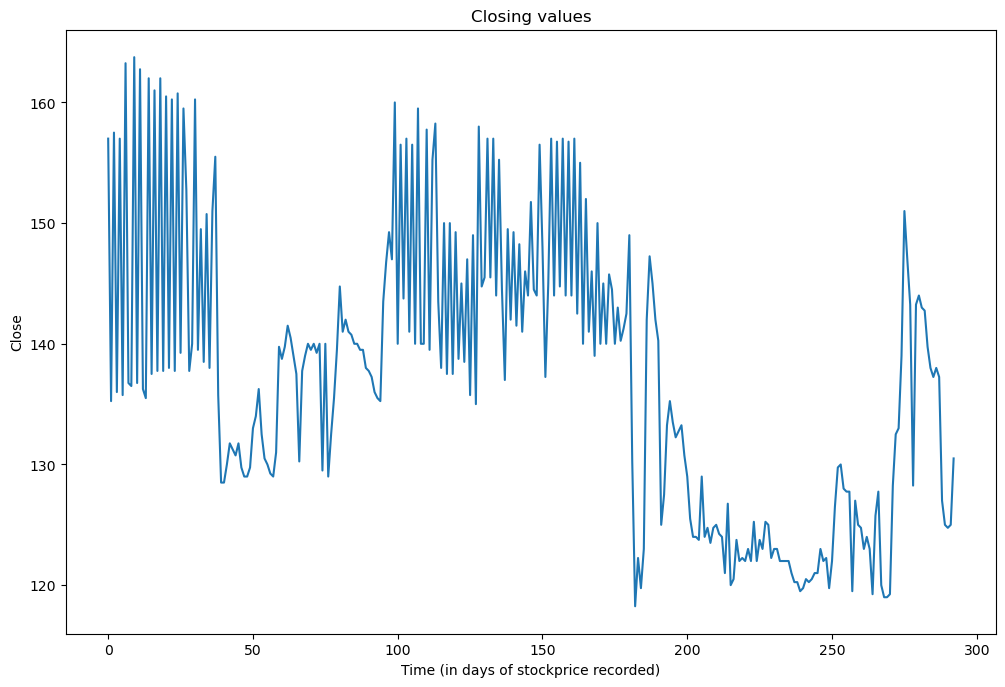

In [24]:
plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(data=data, x='index', y='Close')
plt.title("Closing values")
plt.xlabel("Time (in days of stockprice recorded)")
plt.show()

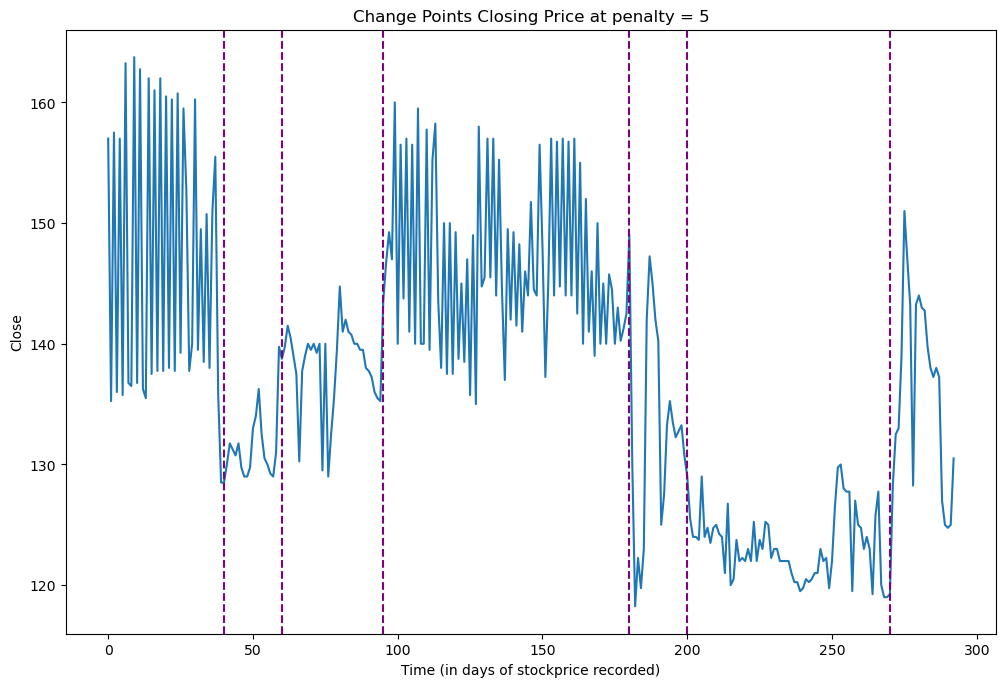

Change points occurred at:
40
60
95
180
200
270


In [26]:
# change point detection
cp_model = rpt.Pelt(model='rbf', min_size=2).fit(data.Close.values)
cp_preds = cp_model.predict(pen=5)  # smaller penalty -> more change points
cp_preds = cp_preds[:-1]  # drop the final change point, as it is at the end of the series
plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(data=data, x='index', y='Close')
plt.title("Change Points Closing Price at penalty = 5")
plt.xlabel("Time (in days of stockprice recorded)")
for cp in cp_preds:
    plt.axvline(x=data.index[cp], color='purple', linestyle='--')
plt.show()

print('Change points occurred at:')
for cp in cp_preds:
    print(data.index[cp])